In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:\\Users\\Amit\\Desktop\\banking.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
df.dropna()

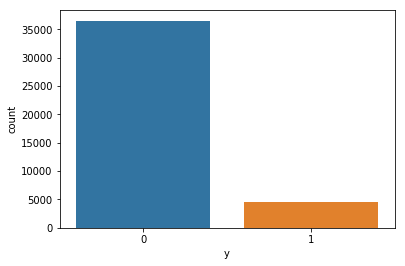

In [6]:
sns.countplot(x='y',data=df)

From the above plot, it quite clear that this a imbalanced dataset.

In [7]:
df[df['y']==0].count()/df.count()*100

age               88.734583
job               88.734583
marital           88.734583
education         88.734583
default           88.734583
housing           88.734583
loan              88.734583
contact           88.734583
month             88.734583
day_of_week       88.734583
duration          88.734583
campaign          88.734583
pdays             88.734583
previous          88.734583
poutcome          88.734583
emp_var_rate      88.734583
cons_price_idx    88.734583
cons_conf_idx     88.734583
euribor3m         88.734583
nr_employed       88.734583
y                 88.734583
dtype: float64

In [8]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in cat_vars:
    a=i
    temp=pd.get_dummies(df[i], prefix=a).iloc[:,1:]
    df=pd.concat([df,temp],axis=1)
df.columns


          

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'

Percentage of non-subscribes: 88%

In [10]:
vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df1=[]
for i in df:
    if i not in vars:
        df1.append(i)
df1

dummy_data

    


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [11]:
dummy_data=df[df1]

In [12]:
dummy_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,0
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,1,0,0,0,0,1,0,0,1,0
7,39,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,0,0,1,0
8,36,174,1,3,1,-2.9,92.963,-40.8,1.266,5076.2,...,0,0,0,0,1,0,0,0,0,1
9,27,191,2,999,1,-1.8,93.075,-47.1,1.410,5099.1,...,0,0,0,0,0,1,0,0,0,0


In [13]:
X = dummy_data.loc[:, dummy_data.columns != 'y']
y = dummy_data.loc[:, dummy_data.columns == 'y']


In [14]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

Feature Selection

In [17]:
final_vars=dummy_data.columns.values.tolist()
y=['y']
X=[i for i in final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False  True False False False
  True False  True False False  True False False False False False  True
 False False False  True False  True False  True False False False False
 False False False False  True False  True  True  True  True  True  True
 False False  True  True  True]
[32 31 15 34  1  1 17 28  1 23 11 25  1  9  1  7 10  1  8 22 26 30 14  1
  4 16  3  1  6  1  2  1 33 12 13 19 24 20 27  5  1 29  1  1  1  1  1  1
 21 18  1  1  1]


In [20]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_unknown', 
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
results=logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.566590
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.183     
Dependent Variable:   y                 AIC:               57976.0133
Date:                 2020-04-18 17:45  BIC:               58117.4885
No. Observations:     51134             Log-Likelihood:    -28972.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.3393   0.0080 -42.1601 0.0000 -0.3551 -0.3235
job_blue-collar 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred=reg.predict(X_test)

In [25]:
reg.score(X_test,y_test)

0.7385437715924646

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6180 1486]
 [2525 5150]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.81      0.75      7666
          1       0.78      0.67      0.72      7675

avg / total       0.74      0.74      0.74     15341

